# DATA INSIGHTS FOR HR ON EMPLOYEES LEAVING*

## Description and Deliverables

This project is to analyze build predictive models that can provide insights to the Human Resources (HR) department

### Understand the business scenario and problem

Find out the way to improve employees' satisfaction levels at VF Motors based on dataset provided by The HR department.

The question to answer: **What’s likely make the employee leave the company?**

Goals: Explore the dataset and Build a model that predicts whether or not an employee will leave the company.

## STEP 1: IMPORTS

*   Import packages
*   Load dataset



### 1.1 Import packages

In [1]:
# Import packages

# For EDA and Data manipulation:

import pandas as pd
import numpy as np

# For Data visualization:

import matplotlib.pyplot as plt
import seaborn as sns

# For data modeling

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder


# For metrics and helpful functions

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

### 1.2 Load dataset

In [2]:
# Load dataset into a dataframe

df = pd.read_csv("HR_capstone_dataset.csv")

# Set up df to see all columns

pd.set_option('display.max_columns', None)

# Display first few rows of the dataframe

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## STEP 2: EDA & DATA MANIPULATION

### 2.1 Quick Review

In [3]:
# Gather basic information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### 2.2 Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data

df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### 2.3 Check Categorical Columns

In [5]:
# Department

df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [6]:
# Salary

df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

### 2.4 Check For Missing Data

In [7]:
# Check for missing values

df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### 2.5 Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates

df.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed

df[df.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates:

df = df.drop_duplicates()

# Display first few rows of new dataframe as needed

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
# Check duplicated again

df.duplicated().sum()

0

### 2.6 Check outliers

Check `number_project`, `average_montly_hours`, `time_spend_company` for outlier

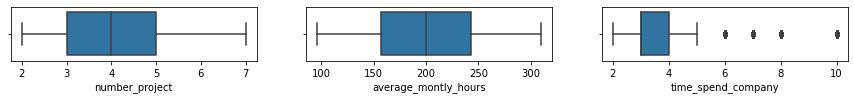

In [12]:
# Create a boxplot to visualize distribution

fig, axis = plt.subplots(1,3,figsize = (15,1))
sns.boxplot(df['number_project'],ax = axis[0])
sns.boxplot(df['average_montly_hours'],ax = axis[1])
sns.boxplot(df['time_spend_company'],ax = axis[2])
plt.show()

In [13]:
# Calculate quantile 25, 75

q1 = df['time_spend_company'].quantile(0.25)
q3 = df['time_spend_company'].quantile(0.75)

# Calculate interquantile range

iqr = q3 - q1

# Calculate lower/upper limit:

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

print('Lower limit:', lower_limit)
print('Upper limit:', upper_limit)

# Subset outliers:

outliers = df[(df['time_spend_company'] > upper_limit) | (df['time_spend_company'] < lower_limit)]

# Count outlier rows:

print('Outliers rows:', len(outliers))


Lower limit: 1.5
Upper limit: 5.5
Outliers rows: 824


In [14]:
# Calculate Min, Max

print(df['time_spend_company'].max())
print(df['time_spend_company'].min())

10
2


Outliers on the right size (upper limit) only. For more effective of the prediction, over 5.5years could be remove.

In [15]:
# Remove outliers from the DataFrame

df = df[(df['time_spend_company'] >= lower_limit) & (df['time_spend_company'] <= upper_limit)]
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low


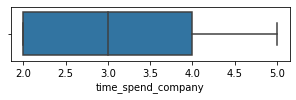

In [16]:
plt.figure(figsize=(5, 1))
sns.boxplot(df['time_spend_company'])
plt.show()

[Double-click to enter your responses here.]

### 2.7 Check Object Column: `left`

In [17]:
# Get numbers of people who left vs. stayed

print(df['left'].value_counts())
print()

# Get percentages of people who left vs. stayed

print(df['left'].value_counts(normalize = True))

0    9285
1    1882
Name: left, dtype: int64

0    0.831468
1    0.168532
Name: left, dtype: float64


--> data is imbalanced with bias to no `left` 

### 2.8 Data Visualizations

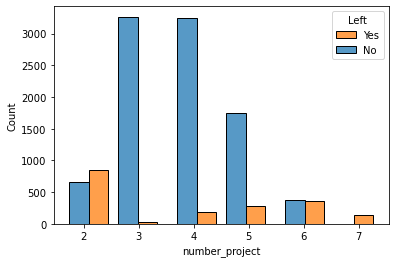

In [18]:
# Histogram number_project vs left

sns.histplot(data = df, x = 'number_project', hue = 'left',multiple = 'dodge',shrink = 4)
plt.legend(title='Left', labels=['Yes', 'No'])
plt.show()

#### Observation:
- At 2, 6 projects, `left` and `stay` kinda balance
- At 3, 4, 5 projects, `stay` dominance `left`. So either `left` get fired for not taking projects, or employees who would leave would not taking/be assigned projects anymore
- At 7 projects, all `left`

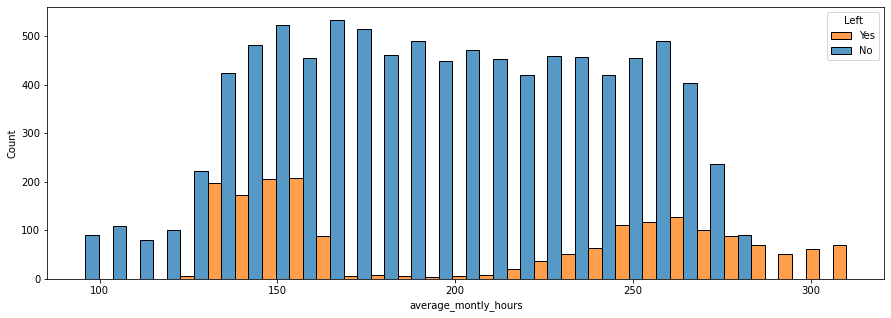

In [19]:
# Histogram average_monthly_hours vs left

plt.figure(figsize = (15,5))
sns.histplot(data = df, x = 'average_montly_hours', hue = 'left',multiple = 'dodge')
plt.legend(title='Left', labels=['Yes', 'No'])
plt.show()

#### Observation:
- Most `left` at 130-170 and 220-320, lower at 170-220 and no `left` at 90-130

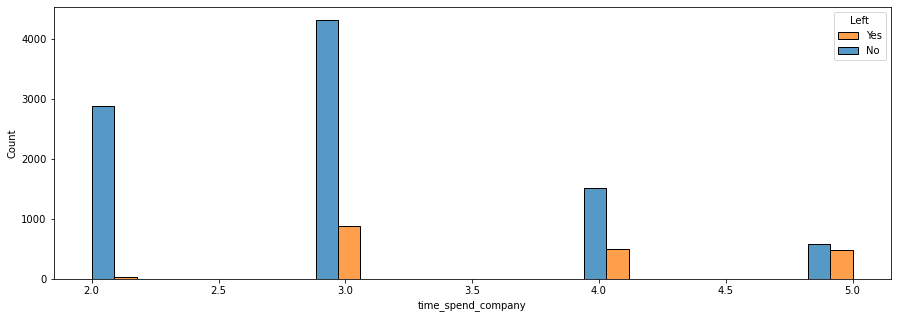

In [20]:
# Histogram time_spend_company vs left

plt.figure(figsize = (15,5))
sns.histplot(data = df, x = 'time_spend_company', hue = 'left',multiple = 'dodge')
plt.legend(title='Left', labels=['Yes', 'No'])
plt.show()

#### Observation:
- Most `left` at 3 years, least at 2 years and same at 4-5 years.

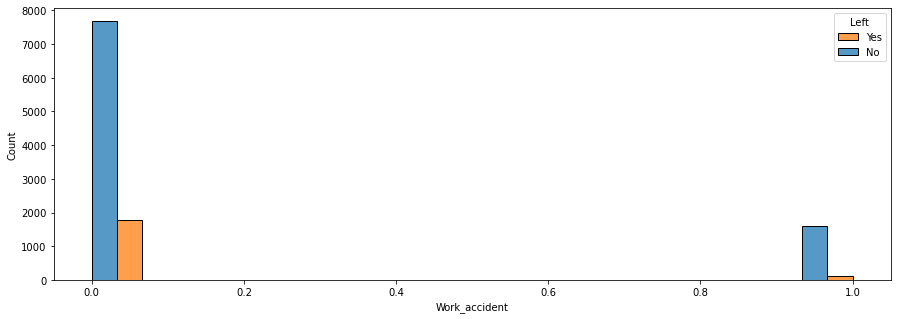

In [21]:
# Histogram Work_accident vs left

plt.figure(figsize = (15,5))
sns.histplot(data = df, x = 'Work_accident', hue = 'left',multiple = 'dodge')
plt.legend(title='Left', labels=['Yes', 'No'])
plt.show()

#### Observation:
- Doesn't seem like any relation btw `accident` and `left`

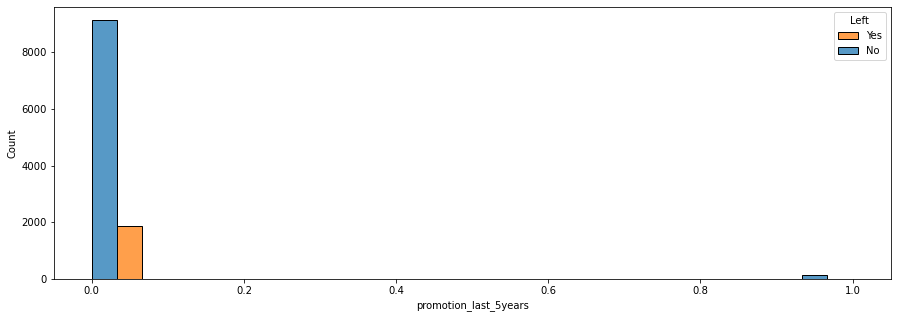

In [22]:
# Histogram promotion_last_5years vs left

plt.figure(figsize = (15,5))
sns.histplot(data = df, x = 'promotion_last_5years', hue = 'left',multiple = 'dodge')
plt.legend(title='Left', labels=['Yes', 'No'])
plt.show()

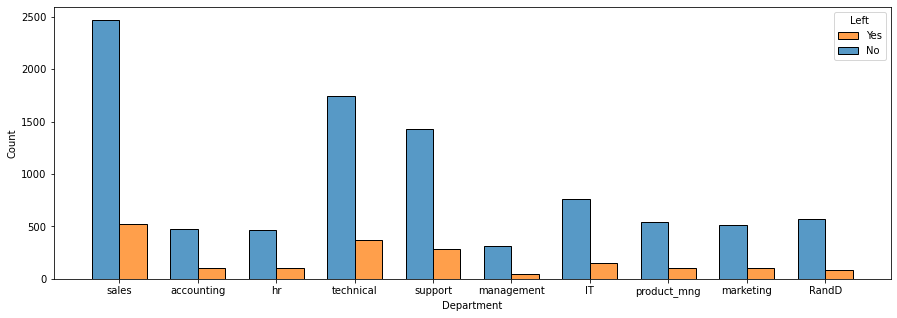

In [23]:
# Histogram Department vs left

plt.figure(figsize = (15,5))
sns.histplot(data = df, x = 'Department', hue = 'left',multiple = 'dodge',shrink = .7)
plt.legend(title='Left', labels=['Yes', 'No'])
plt.show()

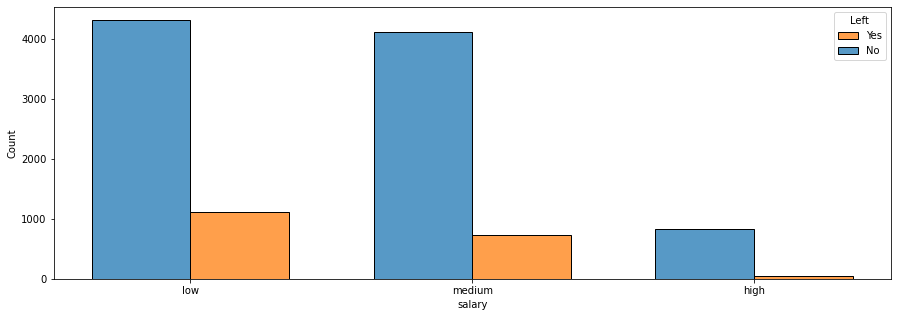

In [24]:
# Histogram salary vs left

plt.figure(figsize = (15,5))
sns.histplot(data = df, x = 'salary', hue = 'left',multiple = 'dodge',shrink = .7)
plt.legend(title='Left', labels=['Yes', 'No'])
plt.show()

#### Total Observation

Seems like `salary`,`project_numbers`,`promotion_last_5years`,`'time_spend_company'`,`average_monthly_hours` could be an useful predictor

🔎
## STEP 3: MODEL BUILDING

Since the outcome variable is binary categorical, we will build Logistic Regression, Decision Tree model and Random Forest Model. 

### 3.1. Prepare For Model Building

In [25]:
# Review data:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11167 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11167 non-null  float64
 1   last_evaluation        11167 non-null  float64
 2   number_project         11167 non-null  int64  
 3   average_montly_hours   11167 non-null  int64  
 4   time_spend_company     11167 non-null  int64  
 5   Work_accident          11167 non-null  int64  
 6   left                   11167 non-null  int64  
 7   promotion_last_5years  11167 non-null  int64  
 8   Department             11167 non-null  object 
 9   salary                 11167 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.2+ MB


In [26]:
# Pick data for modeling:

df = df.drop(['satisfaction_level','last_evaluation','Work_accident','Department'],axis = 1).reset_index()
df = df.drop('index',axis = 1)
df.head()

,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,salary
0,2,157,3,1,0,low
1,7,272,4,1,0,medium
2,5,223,5,1,0,low
3,2,159,3,1,0,low
4,2,153,3,1,0,low


In [27]:
# Check types

df.dtypes

number_project            int64
average_montly_hours      int64
time_spend_company        int64
left                      int64
promotion_last_5years     int64
salary                   object
dtype: object

In [28]:
# Encode salary

df = pd.get_dummies(df,drop_first = True)
df.head()

,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years,salary_low,salary_medium
0,2,157,3,1,0,1,0
1,7,272,4,1,0,0,1
2,5,223,5,1,0,1,0
3,2,159,3,1,0,1,0
4,2,153,3,1,0,1,0


In [29]:
# Create X, Y 

Y = df['left']
X = df.drop('left',axis = 1)

In [30]:
# Create train, test

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y, random_state = 40)

### 3.2 Build Logistic Regression Model

In [31]:
# Create df_lr (Logistic Regression Model) and Fit X_train, Y_train

df_lr = LogisticRegression(random_state = 40,solver='sag').fit(X_train,Y_train)

In [32]:
# Get Prediction for Y from X_test with the model

Y_pred_lr = df_lr.predict(X_test)

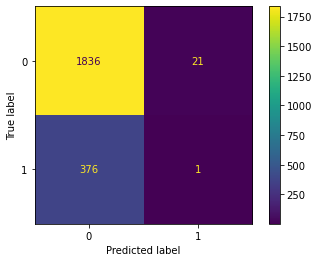

In [33]:
# Plot Confusion Matrix:

df_cm = confusion_matrix(Y_test, Y_pred_lr)
df_disp = ConfusionMatrixDisplay(df_cm,display_labels = df_lr.classes_)
df_disp.plot(values_format ='')
plt.show()

##### We can read the Matrix as belows:
Predicted Labels: 
    0 ~ Negative ~ Model Predict `No Left`
    1 ~ Positive ~ Model Predict `Left`
    
Obseravtion:

1836 True Negative People `Left` and Model Predict `No Left`

376 False Negative ~ People `No Left` and Model Predict `No Left`
    
21 False Positive ~ People `No Left` and Model Predict `Left`
    
1 True Positive ~ People `Left` and Model Predict `Left`

In [34]:
# Review classification report

print(classification_report(Y_test, Y_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1857
           1       0.05      0.00      0.01       377

    accuracy                           0.82      2234
   macro avg       0.44      0.50      0.45      2234
weighted avg       0.70      0.82      0.75      2234



##### The model predicts people who not `left` accuracy, but fail to predicts people who `left` - which is the goal. So Regression Model doesnt work.

### 3.3 Build Decision Tree Model

In [35]:
# Create df_tb (Decision Tree Model):

tree = DecisionTreeClassifier(random_state = 42)

In [36]:
# Assign a dictionary of hyperparameters to search over

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

In [37]:
# # Assign a dictionary of scoring metrics:

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

In [38]:
# Create a grid search object:

df_tree = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [39]:
%%time

# Fit the model with X_train, Y_train

df_tree.fit(X_train, Y_train)

CPU times: user 1.93 s, sys: 0 ns, total: 1.93 s
Wall time: 1.93 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         

In [40]:
# Check best parameters

df_tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [41]:
# Check best AUC score

df_tree.best_score_

0.9639078368660605

AUC score = 0.96 

--> High true positive rate (sensitivity) while keeping a low false positive rate (1 - specificity)

--> Well-performing model that effectively distinguishes between the positive and negative classes.

True Positive: People Left and Predict Left

False Positive: People No Left and Predict Left

--> Model predicts `left` well

In [42]:
# Predict Y from Model

Y_pred_tree = df_tree.predict(X_test)

In [43]:
# Review classification report

print(classification_report(Y_test, Y_pred_tree))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1857
           1       0.91      0.93      0.92       377

    accuracy                           0.97      2234
   macro avg       0.95      0.96      0.95      2234
weighted avg       0.97      0.97      0.97      2234



##### Observation:
Overall, the classifier is performing well, with high precision, recall, and accuracy. 

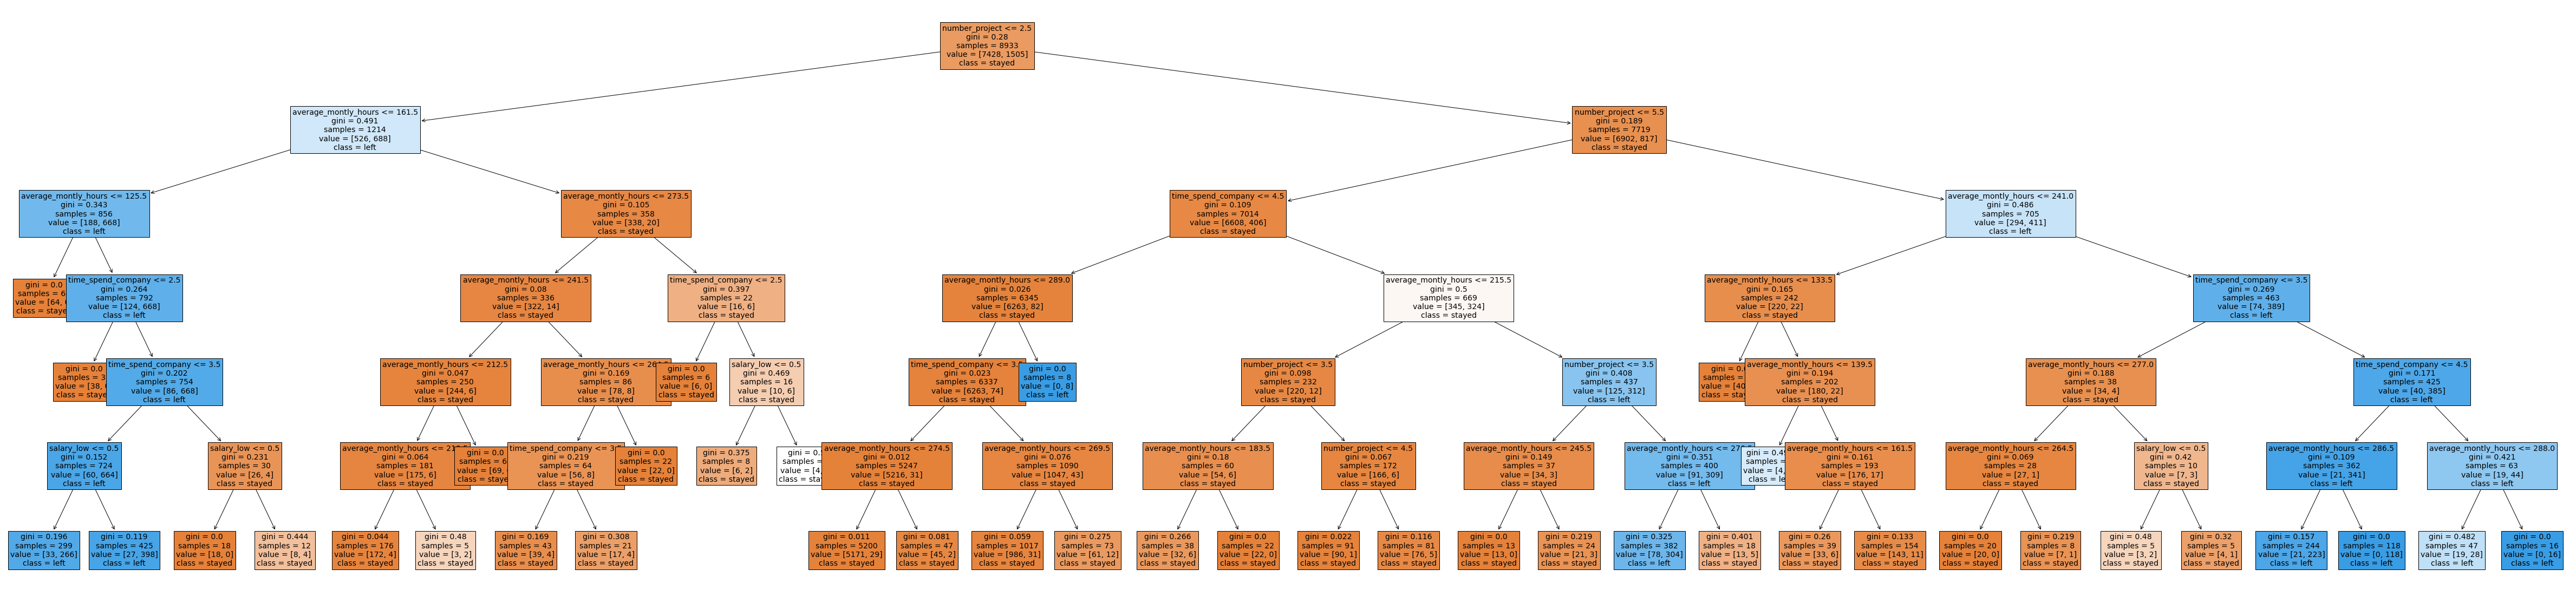

In [44]:
# Plot tre tree
plt.figure(figsize=(85,20))
plot_tree(df_tree.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [45]:
# Feature importance
df_tree_importance = pd.DataFrame(df_tree.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
df_tree_importance = df_tree_importance['gini_importance'].sort_values(ascending = False).reset_index()
df_tree_importance

,index,gini_importance
0,number_project,0.425351
1,average_montly_hours,0.360507
2,time_spend_company,0.212572
3,salary_low,0.001570
4,promotion_last_5years,0.000000
5,salary_medium,0.000000


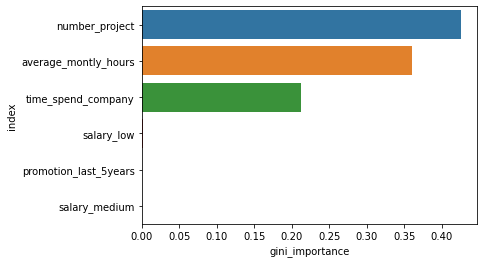

In [46]:
# Plot feature importances to bar chart

sns.barplot(data = df_tree_importance,
            y = 'index',
            x = 'gini_importance')
plt.show()

Bar Chart shows that in Decision Tree Model, `number_project`, `average_monthly_hours`, `time_spend_company` are the most importance features \
--> strongest predictors to `left`

The remaining features ~ 0

### 3.4 Build Random Forest Model

In [47]:
# Create df_tb (Decision Tree Model):

forest = RandomForestClassifier(random_state = 42)

In [48]:
# Create a grid search object:

df_forest = GridSearchCV(forest, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [49]:
%%time

# Fit model with X_train, Y_train, use the same params and scoring above

df_forest.fit(X_train, Y_train)

CPU times: user 46.4 s, sys: 139 ms, total: 46.6 s
Wall time: 46.6 s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [50]:
# Check best parameters

df_forest.best_params_

{'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [51]:
# Check best AUC score

df_forest.best_score_

0.9724171515290321

AUC score = 0.97 higher than Decision Tree Model

In [52]:
# Feature importance
df_forest_importance = pd.DataFrame(df_forest.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
df_forest_importance = df_forest_importance['gini_importance'].sort_values(ascending = False).reset_index()
df_forest_importance

,index,gini_importance
0,number_project,0.435122
1,average_montly_hours,0.328964
2,time_spend_company,0.224063
3,salary_low,0.007628
4,salary_medium,0.003488
5,promotion_last_5years,0.000735


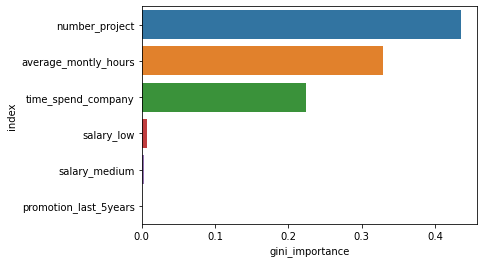

In [53]:
# Plot feature importances to bar chart

sns.barplot(data = df_forest_importance,
            y = 'index',
            x = 'gini_importance')
plt.show()

Bar Chart shows that in Random Forest Model, `number_project`, `average_monthly_hours`, `time_spend_company` are the most importance features \
--> strongest predictors to `left`

`salary` can also assist the model prediction.

`promotion_last_5years` ~ 0

## STEP 4: CONCLUSION

- Can either use Decision Tree or Random Forest Model to predict either an employee would leave or not.
- The most importance features to collect for the models: `number_project`, `average_monthly_hours`, `time_spend_company`. Besides, `salary` can also be collected to raise the accuracy of prediction.
- On other hands, in order to solve employees' leaving, employers should consider 3 factors: `number_project`, `average_monthly_hours`, `time_spend_company`
